# Notebook to process k27ac
Please launch `~/work/washu/analysis/chipseq_diff.sh` beforehand!

In [46]:
%matplotlib inline
%run ~/work/washu/bed/bedtrace.py
import matplotlib.pyplot as plt

In [47]:
import os
PEAKS_FOLDER='/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/k27ac_bams_macs_broad_0.01'
PEAKS_NAMES={
    'OD4': 'OD_ac_BC4_R1_hg19_0.01_peaks.broadPeak',
    'OD5': 'OD_ac_BC5_R1_hg19_0.01_peaks.broadPeak',
    'OD6': 'OD_ac_BC6_R1_hg19_0.01_peaks.broadPeak',
    'YD1': 'YD_ac_BC1_R1_hg19_0.01_peaks.broadPeak',
    'YD2': 'YD_ac_BC2_R1_hg19_0.01_peaks.broadPeak',
    'YD3': 'YD_ac_BC3_R1_hg19_0.01_peaks.broadPeak'
}
PEAKS={}
for id, filename in PEAKS_NAMES.items():
    PEAKS[id] = Bed(os.path.join(PEAKS_FOLDER, filename))
for n,p in PEAKS.items():
    print(n, str(p))

OD6 OD_ac_BC6_R1_hg19_0.01_peaks.broadPeak
OD5 OD_ac_BC5_R1_hg19_0.01_peaks.broadPeak
YD1 YD_ac_BC1_R1_hg19_0.01_peaks.broadPeak
YD2 YD_ac_BC2_R1_hg19_0.01_peaks.broadPeak
YD3 YD_ac_BC3_R1_hg19_0.01_peaks.broadPeak
OD4 OD_ac_BC4_R1_hg19_0.01_peaks.broadPeak


# Q values peaks intersection

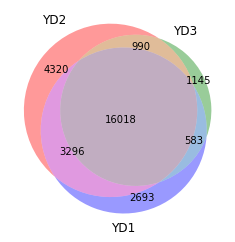

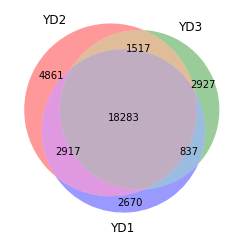

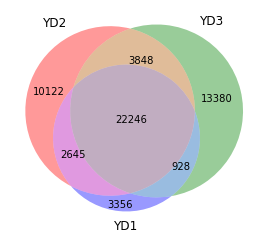

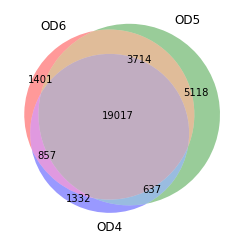

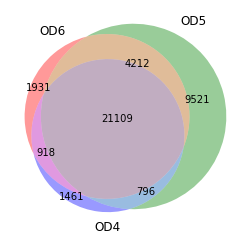

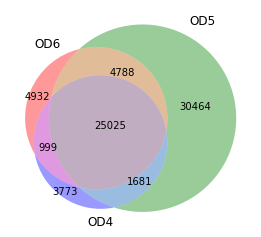

In [48]:
for Q in (0.001, 0.01, 0.1):
    metapeaks({'YD1': Bed(PEAKS['YD1'].path.replace('0.01', str(Q))), 
               'YD2': Bed(PEAKS['YD2'].path.replace('0.01', str(Q))), 
               'YD3': Bed(PEAKS['YD3'].path.replace('0.01', str(Q)))})
    plt.show()
for Q in (0.001, 0.01, 0.1):    
    metapeaks({'OD4': Bed(PEAKS['OD4'].path.replace('0.01', str(Q))), 
               'OD5': Bed(PEAKS['OD5'].path.replace('0.01', str(Q))), 
               'OD6': Bed(PEAKS['OD6'].path.replace('0.01', str(Q)))})
    plt.show()    

# What is unique?

In [49]:
YD1=PEAKS['YD1']
YD2=PEAKS['YD2']
YD3=PEAKS['YD3']
YD=intersect(YD1, YD2, YD3)

OD4=PEAKS['OD4']
OD5=PEAKS['OD5']
OD6=PEAKS['OD6']
OD=intersect(OD4, OD5, OD6)

minus(OD5, union(OD4, OD6)).process_pvalue()

TRACE /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracey_sx5g9c_trace.bed
RESULT /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracey_sx5g9c_pvalue.bed
HEAD
chr5	73157012	73157459	14.57419
chr6_ssto_hap7	3991509	3994028	14.25349
chr3	47006492	47006688	13.82328
chr1	28632944	28633156	13.69607
chr2	191280524	191281363	12.61019

TAIL
chr7	76946069	76946301	3.92386
chr2	113337965	113338526	3.92316
chr20	47886820	47887105	3.9231
chr16	31200548	31200917	3.92308
chr17	17841713	17842264	3.91941



'/var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracey_sx5g9c_pvalue.bed'

## Intersection based

TRACE /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracesfgwaxo1_trace.bed
RESULT /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracesfgwaxo1_pvalue.bed
HEAD
chr7	158502758	158503939	13.70052
chr6	32555362	32559593	12.97413
chr6	32569998	32579892	12.0795
chr4	3046322	3048181	11.37679
chr16	48663960	48664593	11.31302

TAIL
chr3	196338299	196339985	4.2201
chr3	171919240	171919679	4.21291
chr6	133083341	133084684	4.17302
chr7	76967801	76969035	4.15658
chr22	45618191	45619505	4.13206

TRACE /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtrace0o7dka2d_trace.bed
RESULT /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtrace0o7dka2d_pvalue.bed
HEAD
chr2	95873021	95873273	18.54426
chr11	14912621	14914102	14.41327
chr10	26911314	26911636	14.26281
chr10	23001875	23004134	14.07783
chr7	90793709	90795469	13.88663

TAIL
chr20	58688188	58688877	4.05773
chr6	149586050	149588830	4.04246
chr16	46406448	46407849	3.97219
chr1	185463862	185464650	3.9387
chr14	105779982	105781251	3.9357

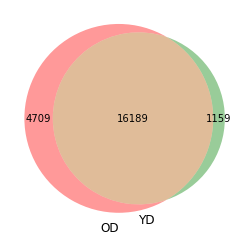

In [50]:
YD_inter=minus(YD, OD)
YD_inter.process_pvalue()
OD_inter=minus(OD, YD)
OD_inter.process_pvalue()
metapeaks({'YD': YD, 'OD': OD})

## MACS2 pooled bdgdiff

In [51]:
YD_bdgdiff=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_macs_bdgdiff/diff_k27ac_Y_O_0.01_c3.0_cond1.bed')
OD_bdgdiff=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_macs_bdgdiff/diff_k27ac_Y_O_0.01_c3.0_cond1.bed')
YD_and_OD_bdgdiff=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_macs_bdgdiff/diff_k27ac_Y_O_0.01_c3.0_common.bed')

print('YD and OD', YD_and_OD_bdgdiff.count())
print('YD exclusive', YD_bdgdiff.count())
print('OD exclusive', OD_bdgdiff.count())
YD_bdgdiff.process_pvalue()
OD_bdgdiff.process_pvalue()

YD and OD 24701
YD exclusive 429
OD exclusive 429
TRACE /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracewrwucp90_trace.bed
RESULT /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracewrwucp90_pvalue.bed
HEAD
chr2	181988290	181988494	11.05892
chr5	167655209	167655707	10.61308
chrY	23334234	23335354	10.4619
chr6	112078313	112078573	9.93712
chrY	23418894	23420050	9.25045

TAIL
chr2	230273822	230274225	3.88516
chr2	230195373	230195746	3.88003
chr6	15622319	15622670	3.876
chr2	100388077	100388404	3.82124
chr2	230175798	230176070	3.81828

TRACE /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracee6p6cs7r_trace.bed
RESULT /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracee6p6cs7r_pvalue.bed
HEAD
chr2	181988290	181988494	11.05892
chr5	167655209	167655707	10.61308
chrY	23334234	23335354	10.4619
chr6	112078313	112078573	9.93712
chrY	23418894	23420050	9.25045

TAIL
chr2	230273822	230274225	3.88516
chr2	230195373	230195746	3.88003
chr6	15622319	15622670	3.876
chr2	10038807

'/var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracee6p6cs7r_pvalue.bed'

## MACS2 pooled with Y vs O as control

In [52]:
YD_pooled_control=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_macs_pooled_1_vs_2/diff_k27ac_Y_O_1_vs_2_0.01_peaks.broadPeak')
OD_pooled_control=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_macs_pooled_1_vs_2/diff_k27ac_Y_O_2_vs_1_0.01_peaks.broadPeak')
print('YD exclusive', YD_pooled_control.count())
YD_pooled_control.process_pvalue()
print('OD exclusive', OD_pooled_control.count())
OD_pooled_control.process_pvalue()

YD exclusive 1979
TRACE /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracenz17bud0_trace.bed
RESULT /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracenz17bud0_pvalue.bed
HEAD
chr5	167654663	167655775	17.07225
chrY	23418428	23420142	16.95574
chr6	144911419	144912210	16.86312
chr17	39071435	39072048	16.31437
chr5	35810584	35811924	16.06533

TAIL
chr10	35421384	35421673	5.7332
chr16	4515387	4515715	5.72706
chr17	45792690	45792920	5.70079
chr12	9912392	9912860	5.69454
chr17	62981561	62981879	5.68713

OD exclusive 11038
TRACE /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracese960ma9_trace.bed
RESULT /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracese960ma9_pvalue.bed
HEAD
chr2	98207118	98207285	16.11869
chr21	46975612	46976075	15.77647
chr18	48347489	48347709	15.43617
chr9	71320168	71320864	14.33236
chr1	7887269	7887443	14.08278

TAIL
chr13	27914569	27914818	4.93672
chr11	64788513	64789018	4.93517
chr13	46926658	46927249	4.93143
chr7	127672528	127672797	4.9263


'/var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracese960ma9_pvalue.bed'

## ChIPDIFF

In [53]:
YD_chipdiff=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_chipdiff/diff_k27ac_Y_O_3_cond1.bed')
OD_chipdiff=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_chipdiff/diff_k27ac_Y_O_3_cond2.bed')
print('YD exclusive', YD_chipdiff.count())
YD_chipdiff.head()
print('OD exclusive', OD_chipdiff.count())
OD_chipdiff.head()

YD exclusive 50
HEAD
chr1	111170000	111171000
chr1	209833000	209834000
chr2	99275000	99281000
chr2	100388000	100389000
chr2	181988000	181991000

OD exclusive 44
HEAD
chr1	25655000	25657000
chr1	41327000	41328000
chr1	90286000	90288000
chr1	201539000	201541000
chr1	228271000	228272000



## DiffBIND

In [54]:
YD_diffbind=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_diffbind/k27ac_diffbind_cond1.bed')
OD_diffbind=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_diffbind/k27ac_diffbind_cond2.bed')
print('YD exclusive', YD_diffbind.count())
YD_diffbind.head()
print('OD exclusive', OD_diffbind.count())
OD_diffbind.head()

YD exclusive 429
HEAD
chr1	8212454	8213531	1078	*	3.96	4.93	-0.84	5.78	7.98e-10	8.7e-07
chr1	8241841	8243558	1718	*	4.85	5.46	3.77	1.69	0.00289	0.0352
chr1	10554917	10559320	4404	*	5.72	6.46	4.13	2.33	0.000702	0.0156
chr1	20511759	20514063	2305	*	4.87	5.58	3.41	2.16	0.00401	0.0426
chr1	28417357	28419402	2046	*	5.12	5.92	3.16	2.76	1.53e-06	0.000286

OD exclusive 2700
HEAD
chr1	1240626	1241722	1097	*	3.67	1.92	4.44	-2.52	0.00204	0.0283
chr1	2120498	2121850	1353	*	5.69	4.75	6.26	-1.51	0.00161	0.0246
chr1	3087386	3087949	564	*	3.32	0.66	4.2	-3.54	1.62e-05	0.00142
chr1	3582744	3583448	705	*	3.65	2.15	4.37	-2.22	0.00115	0.0207
chr1	3593591	3596014	2424	*	5.37	3.59	6.14	-2.55	5.14e-06	0.000628



# YD differential peaks consistency

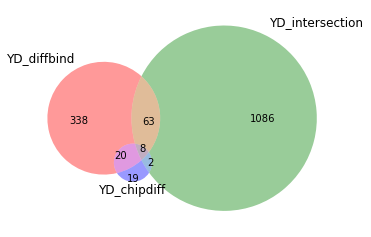

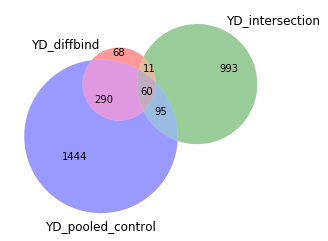

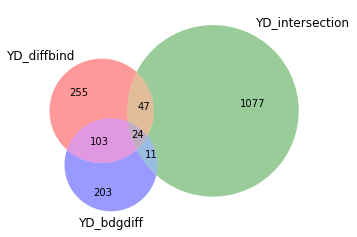

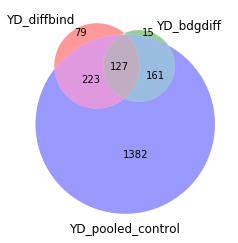

In [55]:
metapeaks({'YD_intersection': YD_inter, 'YD_diffbind': YD_diffbind, 'YD_chipdiff': YD_chipdiff})
plt.show()
metapeaks({'YD_intersection': YD_inter, 'YD_diffbind': YD_diffbind, 'YD_pooled_control': YD_pooled_control})
plt.show()
metapeaks({'YD_intersection': YD_inter, 'YD_diffbind': YD_diffbind, 'YD_bdgdiff': YD_bdgdiff})
plt.show()
metapeaks({'YD_pooled_control': YD_pooled_control, 'YD_diffbind': YD_diffbind, 'YD_bdgdiff': YD_bdgdiff})
plt.show()

# OD differential peaks consitency

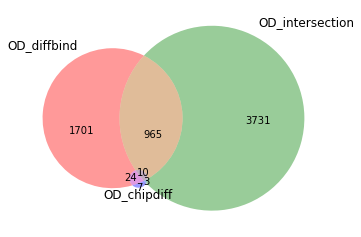

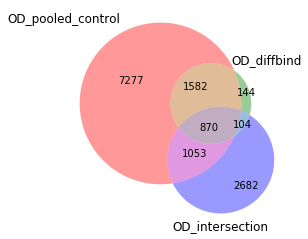

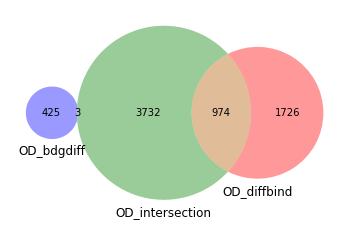

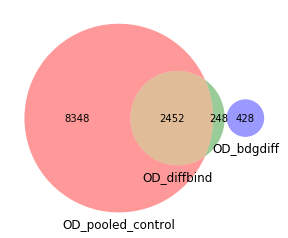

In [56]:
metapeaks({'OD_intersection': OD_inter, 'OD_diffbind': OD_diffbind, 'OD_chipdiff': OD_chipdiff})
plt.show()
metapeaks({'OD_intersection': OD_inter, 'OD_diffbind': OD_diffbind, 'OD_pooled_control': OD_pooled_control})
plt.show()
metapeaks({'OD_intersection': OD_inter, 'OD_diffbind': OD_diffbind, 'OD_bdgdiff': OD_bdgdiff})
plt.show()
metapeaks({'OD_pooled_control': OD_pooled_control, 'OD_diffbind': OD_diffbind, 'OD_bdgdiff': OD_bdgdiff})
plt.show()

# Difference introspection

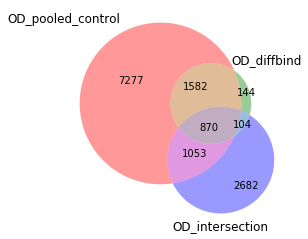

minus
	diff_k27ac_Y_O_2_vs_1_0.01_peaks.broadPeak
	union
		k27ac_diffbind_cond2.bed
		minus
			intersection
				OD_ac_BC4_R1_hg19_0.01_peaks.broadPeak
				OD_ac_BC5_R1_hg19_0.01_peaks.broadPeak
				OD_ac_BC6_R1_hg19_0.01_peaks.broadPeak
			intersection
				YD_ac_BC1_R1_hg19_0.01_peaks.broadPeak
				YD_ac_BC2_R1_hg19_0.01_peaks.broadPeak
				YD_ac_BC3_R1_hg19_0.01_peaks.broadPeak
TRACE /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtraceir6zda68_trace.bed
RESULT /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtraceir6zda68_pvalue.bed
HEAD
chr8	674131	674942	13.37632
chr8	144107431	144108189	13.31294
chr21	43098832	43099070	13.18715
chr14	58764663	58766580	12.96231
chr11	62473230	62473710	12.75119

TAIL
chr13	27914569	27914818	4.93672
chr11	64788513	64789018	4.93517
chr13	46926658	46927249	4.93143
chr7	127672528	127672797	4.9263
chr13	80735591	80736145	4.91357

minus
	minus
		intersection
			OD_ac_BC4_R1_hg19_0.01_peaks.broadPeak
			OD_ac_BC5_R1_hg19_0.01_peaks.broadPeak
			OD_a

'/var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracep0mvgs1n_pvalue.bed'

In [57]:
metapeaks({'OD_intersection': OD_inter, 'OD_diffbind': OD_diffbind, 'OD_pooled_control': OD_pooled_control})
plt.show()
x = minus(OD_pooled_control, union(OD_diffbind, OD_inter))
print(x)                                   
x.process_pvalue()

x = minus(OD_inter, union(OD_diffbind, OD_pooled_control))
print(x)                                   
x.process_pvalue()

# Let consider intersection - union

minus
	intersection
		YD_ac_BC1_R1_hg19_0.01_peaks.broadPeak
		YD_ac_BC2_R1_hg19_0.01_peaks.broadPeak
		YD_ac_BC3_R1_hg19_0.01_peaks.broadPeak
	union
		OD_ac_BC4_R1_hg19_0.01_peaks.broadPeak
		OD_ac_BC5_R1_hg19_0.01_peaks.broadPeak
		OD_ac_BC6_R1_hg19_0.01_peaks.broadPeak
105
TRACE /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtrace2a8uatbp_trace.bed
RESULT /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtrace2a8uatbp_pvalue.bed
HEAD
chr5	142246414	142246733	8.45016
chr1	28417356	28419402	8.30953
chr5	35810456	35813099	7.7156
chr6	148704170	148706300	7.19442
chr12	102253200	102254038	6.76591

TAIL
chr13	49720309	49721495	4.44297
chr2	42350403	42352632	4.38608
chr12	9105823	9107427	4.35765
chr5	67574815	67578084	4.32847
chr8	97911760	97913041	4.31007



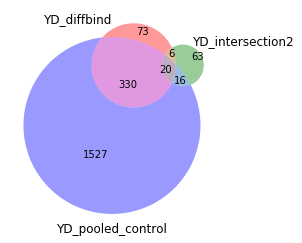

In [58]:
YD_inter2=minus(intersect(YD1, YD2, YD3), union(OD4, OD5, OD6))
print(YD_inter2)
print(YD_inter2.count())
YD_inter2.process_pvalue()
metapeaks({'YD_intersection2': YD_inter2, 'YD_diffbind': YD_diffbind, 'YD_pooled_control': YD_pooled_control})
plt.show()

# F*ckplot (c) Roman

In [59]:
import pandas as pd
db = pd.read_csv('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/\
diff/diff_k27ac_Y_O_diffbind/k27ac_diffbind.csv')
db

,SampleID,Tissue,Factor,Condition,Treatment,Replicate,bamReads,ControlID,bamControl,Peaks,PeakCaller
0,YD_1,CD14,Age,Y,NaN,1,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,YD_pooled,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,macs
1,YD_2,CD14,Age,Y,NaN,2,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,YD_pooled,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,macs
2,YD_3,CD14,Age,Y,NaN,3,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,YD_pooled,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,macs
3,OD_4,CD14,Age,O,NaN,1,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,OD_pooled,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,macs
4,OD_5,CD14,Age,O,NaN,2,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,OD_pooled,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,macs
5,OD_6,CD14,Age,O,NaN,3,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,OD_pooled,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,macs


In [60]:
YDS=[]
for index, row in db[db['Condition'] == 'Y'].iterrows():
    peaks = row['Peaks'].replace('.xls', '.broadPeak')
    YDS.append(Bed(peaks))
print('\n'.join([str(x) + ' ' + str(x.count()) for x in YDS]))

YD_ac_BC1_R1_hg19_0.01_peaks.broadPeak 26102
YD_ac_BC2_R1_hg19_0.01_peaks.broadPeak 28230
YD_ac_BC3_R1_hg19_0.01_peaks.broadPeak 24739


In [61]:
ODS=[]
for index, row in db[db['Condition'] == 'O'].iterrows():
    peaks = row['Peaks'].replace('.xls', '.broadPeak')
    ODS.append(Bed(peaks))
print('\n'.join([str(x) + ' ' + str(x.count()) for x in ODS]))

OD_ac_BC4_R1_hg19_0.01_peaks.broadPeak 26644
OD_ac_BC5_R1_hg19_0.01_peaks.broadPeak 36080
OD_ac_BC6_R1_hg19_0.01_peaks.broadPeak 29672


# Intergroups vs outergroups intersection

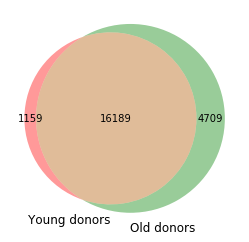

In [62]:
YD_intersection = intersect(*YDS)
OD_intersection = intersect(*ODS)
YD_OD_intersection = intersect(YD_intersection, OD_intersection)
metapeaks({'Young donors': YD_intersection, 'Old donors': OD_intersection})
plt.show()

# Peaks distribution

Common [16189, 16189, 16189, 16189, 16189, 16189]
Group [2094, 2094, 2094, 4920, 4920, 4920]
Samples [7819, 9947, 6456, 5535, 14971, 8563]


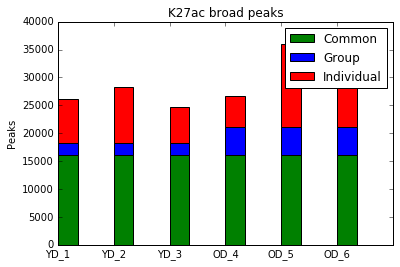

In [63]:
import numpy as np
N = len(YDS) + len(ODS)
ind=np.arange(N)

common_peaks = [YD_OD_intersection.count()] * N 
group_specific = [YD_intersection.count() - YD_OD_intersection.count()] * len(YDS) +\
                [OD_intersection.count() - YD_OD_intersection.count()] * len(ODS)
sample_specific = []
for i in range(0, len(YDS)):
    sample_specific.append(YDS[i].count() - YD_intersection.count())
for i in range(0, len(ODS)):
    sample_specific.append(ODS[i].count() - OD_intersection.count())
    
print('Common', common_peaks)
print('Group', group_specific)
print('Samples', sample_specific)
    
width=0.35
p1 = plt.bar(ind, common_peaks, width, color='green')
p2 = plt.bar(ind, group_specific, width, bottom=common_peaks, color='blue')
p3 = plt.bar(ind, sample_specific, width, bottom=np.sum([common_peaks,group_specific], axis=0), color='red')

plt.ylabel('Peaks')
plt.title('K27ac broad peaks')
plt.xticks(ind, db['SampleID'])
plt.legend((p1[0], p2[0], p3[0]), ('Common', 'Group', 'Individual'))

plt.show()